In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier

In [4]:
df = pd.read_csv('EDA_Customer.csv')

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df

,CustomerID,Age,Gender,ContractType_In_days,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,1083,79.0,Male,365,90.038513,3511.502019,No,No,39,No,Electronic check,Yes
1,1117,60.0,Female,365,80.590894,2901.272196,No,Fiber optic,36,No,Bank transfer,Yes
2,3833,84.0,Female,365,43.042067,1549.514395,No,No,36,No,Mailed check,Yes
3,1976,69.0,Male,365,51.930032,2232.991377,No,No,43,No,Credit card,No
4,3132,49.0,Male,365,101.524194,913.717747,Yes,DSL,9,Yes,Electronic check,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4359,2133,39.0,Male,365,30.017101,210.119705,No,Fiber optic,7,No,Credit card,Yes
4360,1514,54.0,Male,365,57.803077,462.424613,No,DSL,8,Yes,Bank transfer,No
4361,2716,45.0,Male,730,103.314530,826.516243,No,DSL,8,No,Credit card,No
4362,756,21.0,Female,730,103.105344,103.105344,Yes,Fiber optic,1,Yes,Electronic check,Yes


In [11]:
X = df.iloc[:,1:11]

In [12]:
X

,Age,Gender,ContractType_In_days,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod
0,79.0,Male,365,90.038513,3511.502019,No,No,39,No,Electronic check
1,60.0,Female,365,80.590894,2901.272196,No,Fiber optic,36,No,Bank transfer
2,84.0,Female,365,43.042067,1549.514395,No,No,36,No,Mailed check
3,69.0,Male,365,51.930032,2232.991377,No,No,43,No,Credit card
4,49.0,Male,365,101.524194,913.717747,Yes,DSL,9,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...
4359,39.0,Male,365,30.017101,210.119705,No,Fiber optic,7,No,Credit card
4360,54.0,Male,365,57.803077,462.424613,No,DSL,8,Yes,Bank transfer
4361,45.0,Male,730,103.314530,826.516243,No,DSL,8,No,Credit card
4362,21.0,Female,730,103.105344,103.105344,Yes,Fiber optic,1,Yes,Electronic check


In [14]:
y = df.iloc[:,11]

In [28]:
encode = LabelEncoder()
y = pd.Series(encode.fit_transform(y))

In [30]:
y.value_counts()

1    2233
0    2131
Name: count, dtype: int64

In [37]:
X

,Age,Gender,ContractType_In_days,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod
0,79.0,Male,365,90.038513,3511.502019,No,No,39,No,Electronic check
1,60.0,Female,365,80.590894,2901.272196,No,Fiber optic,36,No,Bank transfer
2,84.0,Female,365,43.042067,1549.514395,No,No,36,No,Mailed check
3,69.0,Male,365,51.930032,2232.991377,No,No,43,No,Credit card
4,49.0,Male,365,101.524194,913.717747,Yes,DSL,9,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...
4359,39.0,Male,365,30.017101,210.119705,No,Fiber optic,7,No,Credit card
4360,54.0,Male,365,57.803077,462.424613,No,DSL,8,Yes,Bank transfer
4361,45.0,Male,730,103.314530,826.516243,No,DSL,8,No,Credit card
4362,21.0,Female,730,103.105344,103.105344,Yes,Fiber optic,1,Yes,Electronic check


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [189]:
step1 = ColumnTransformer(transformers=[('cols',
                                        OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')
                                         ,[1,2,5,6,8,9])],remainder='passthrough')
step2 = MinMaxScaler()
                          
step3 = LogisticRegression()
step4 = RandomForestClassifier()
step5 = BernoulliNB()
step6 = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
step7 = SVC()


In [190]:
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

In [191]:
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step4',step4)
])

In [192]:
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step5',step5)
])

In [193]:
pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step6',step6)
])

In [194]:
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step7',step7)
])

In [195]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cols',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 5, 6, 8, 9])])),
                ('step2', MinMaxScaler()), ('step3', LogisticRegression())])

In [196]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cols',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 5, 6, 8, 9])])),
                ('step2', MinMaxScaler()),
                ('step4', RandomForestClassifier())])

In [197]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cols',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 5, 6, 8, 9])])),
                ('step2', MinMaxScaler()), ('step5', BernoulliNB())])

In [198]:
pipe4.fit(X_train,y_train)

C:\Users\Mangukiya Ansh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:44:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cols',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 5, 6, 8, 9])])),
                ('step2', MinMaxScaler()),
                ('step6',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [199]:
pipe5.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cols',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 2, 5, 6, 8, 9])])),
                ('step2', MinMaxScaler()), ('step7', SVC())])

In [200]:
pipe1.score(X_test,y_test)

0.49

In [201]:
pipe2.score(X_test,y_test)

0.495

In [202]:
pipe3.score(X_test,y_test)

0.51

In [203]:
pipe4.score(X_test,y_test)

0.51

In [204]:
pipe5.score(X_test,y_test)

0.485

In [206]:
y_pred = pipe3.predict(X_test)

In [209]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.40      0.46       104
           1       0.49      0.62      0.55        96

    accuracy                           0.51       200
   macro avg       0.52      0.51      0.51       200
weighted avg       0.52      0.51      0.50       200



In [210]:
metrics = confusion_matrix(y_pred,y_test)

<Axes: >

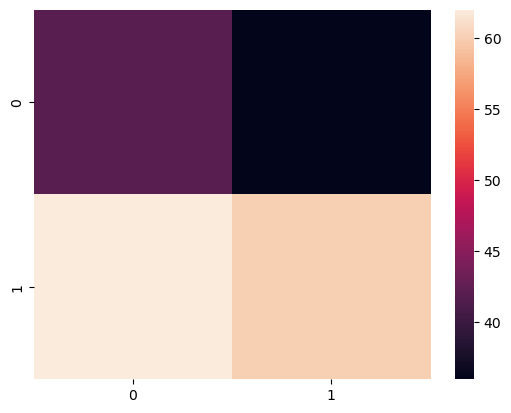

In [213]:
import seaborn as sns
sns.heatmap(metrics)